# This notebook automates simulations

## Step One - Import Needed Libraries

In [1]:
import random as rnd
import operator
import os
import matplotlib.pyplot as plt                 # import matplotlib
import numpy as np                              # import numpy
import time
import copy
import json

# This works only if notebook is in same folder
import dm_bargain
import dm_travel
import dm_agents
import dm_env as env
import dm_utils as dm
import dm_sim_period as simp
import dm_process_results as pr
import env_make_agents as mkt

## Step Two - Set up initial configuration

In [2]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [ZIDP, ZIDP]     # List of artificial traders, length 2, can be same
sim_name = "dm_zidp_30_20_100"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks':  1,    # Number of weeks
    'num_periods': 1,  # Number of days a week
    'num_rounds': 10,   # bargaining rounds per day
    'grid_size': 1,     # Grid is grid_size x grid_size
    'num_traders': 8,  # traders (multiple of two)
    'num_units': 8,     # Number of units per trader
    'lower_bound': 200, # lower bound on values or costs
    'upper_bound': 600  # upper bound on values or costs
}

# this code walks through dict of controls,
# builds and executes assignment statements,
# and prints result
for key, value in controls.items():
    assign = f"{key} = {str(value)}"
    obj = compile(assign, 'assigns', 'exec')
    exec(obj)
    print(f"{key} = {eval(key)}")




num_weeks = 1
num_periods = 1
num_rounds = 10
grid_size = 1
num_traders = 8
num_units = 8
lower_bound = 200
upper_bound = 600


## Running Decentralized



### First make agents

B_1_ZIDP   BUYER  @(0, 0):[  594,  581,  575,  527,  516,  499,  482,  347]cu = 0
B_2_ZIDP   BUYER  @(0, 0):[  527,  508,  494,  452,  446,  353,  348,  340]cu = 0
B_3_ZIDP   BUYER  @(0, 0):[  569,  525,  522,  521,  504,  420,  332,  319]cu = 0
B_4_ZIDP   BUYER  @(0, 0):[  588,  578,  562,  519,  487,  393,  370,  366]cu = 0
S_1_ZIDP   SELLER @(0, 0):[  203,  284,  302,  369,  384,  444,  487,  488]cu = 0
S_2_ZIDP   SELLER @(0, 0):[  205,  222,  241,  257,  264,  365,  465,  473]cu = 0
S_3_ZIDP   SELLER @(0, 0):[  273,  281,  326,  421,  432,  439,  471,  492]cu = 0
S_4_ZIDP   SELLER @(0, 0):[  237,  297,  356,  410,  466,  475,  480,  492]cu = 0

When market test_market is in equilibrium we have:
equilibrium price    = 444 - 446
equilibrium quantity = 22
maximum surplus      = 4564



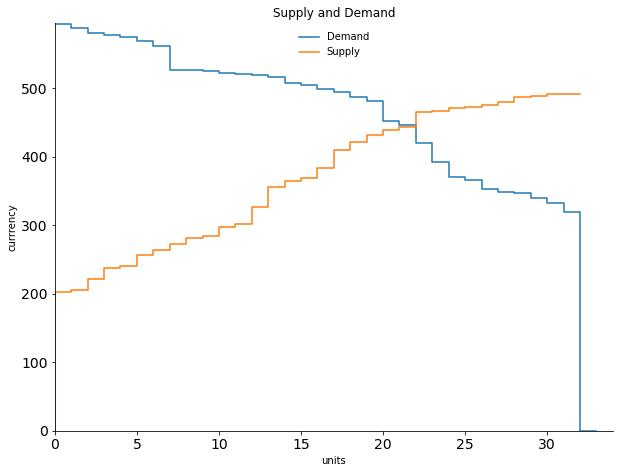

In [3]:
agent_maker = mkt.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
agent_maker.print_agents(agents)

# set up market
agent_maker.make_market("test_market")
agent_maker.show_equilibrium()
agent_maker.plot_market()
market = agent_maker.get_market()

### Example showing .set_locations()

In [4]:
agent_maker = mkt.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agents = agent_maker.get_agents()
agent_maker.print_agents(agents)
print()
# set up market
agent_maker.set_locations(grid_size)
agent_maker.print_agents(agents)

B_1_ZIDP   BUYER  @(0, 0):[  563,  498,  496,  458,  450,  440,  374,  363]cu = 0
B_2_ZIDP   BUYER  @(0, 0):[  593,  498,  458,  383,  378,  368,  337,  330]cu = 0
B_3_ZIDP   BUYER  @(0, 0):[  597,  573,  528,  502,  495,  413,  388,  366]cu = 0
B_4_ZIDP   BUYER  @(0, 0):[  585,  458,  446,  434,  429,  356,  337,  312]cu = 0
S_1_ZIDP   SELLER @(0, 0):[  239,  243,  274,  278,  300,  325,  355,  491]cu = 0
S_2_ZIDP   SELLER @(0, 0):[  201,  264,  296,  317,  321,  480,  495,  497]cu = 0
S_3_ZIDP   SELLER @(0, 0):[  269,  318,  348,  360,  402,  412,  463,  492]cu = 0
S_4_ZIDP   SELLER @(0, 0):[  235,  284,  326,  389,  416,  421,  427,  498]cu = 0

B_1_ZIDP   BUYER  @(0, 0):[  563,  498,  496,  458,  450,  440,  374,  363]cu = 0
B_2_ZIDP   BUYER  @(0, 0):[  593,  498,  458,  383,  378,  368,  337,  330]cu = 0
B_3_ZIDP   BUYER  @(0, 0):[  597,  573,  528,  502,  495,  413,  388,  366]cu = 0
B_4_ZIDP   BUYER  @(0, 0):[  585,  458,  446,  434,  429,  356,  337,  312]cu = 0
S_1_ZIDP   SELL

### Function to print extended contracts

In [4]:
def print_contracts(contracts):
    print("CONTRACTS:")
    print("rnd, b_cu:b_val -price- s_cos:s_cu  buyer_id, seller_id")
    print("-------------------------------------------------------")
    for contract in contracts:
        round = contract[0]
        price = contract[1]
        buyer = contract[2]
        seller = contract[3]
        b_cur = contract[4]
        b_val = contract[5]
        s_cur = contract[6]
        s_cos = contract[7]
        print(f"{round:2} {b_cur:3}:{b_val:4} -{price:4}-{s_cos:4}{s_cur:3}    {buyer:10} {seller:10}")


### Second run simulation

In [5]:
contracts = []
week = 1
period = 1
sim_agents = copy.deepcopy(agents)
sim1 = simp.SimPeriod(sim_name, week, period, num_rounds, sim_agents, 
                market, grid_size, debug, plot_on)
for period in range(num_periods):
    sim1.run_period()
    contracts.extend(sim1.get_contracts())

print()
print_contracts(contracts)



('ASK', 419) ('ASK', 366) ('BID', 249) ('ASK', 551) ('ASK', 386) ('BID', 276) ('BID', 279) ('BID', 525) 
(0, 525, 'B_4_ZIDP', 'S_4_ZIDP', 0, 588, 0, 237)
(0, 366, 'B_3_ZIDP', 'S_1_ZIDP', 0, 569, 0, 203)
(0, 279, 'B_1_ZIDP', 'S_2_ZIDP', 0, 594, 0, 205)
(0, 386, 'B_1_ZIDP', 'S_3_ZIDP', 1, 581, 0, 273)
('BID', 204) ('BID', 471) ('ASK', 231) ('ASK', 519) ('ASK', 327) ('BID', 242) ('ASK', 400) ('BID', 502) 
(1, 231, 'B_2_ZIDP', 'S_2_ZIDP', 0, 527, 1, 222)
(1, 502, 'B_4_ZIDP', 'S_2_ZIDP', 1, 578, 2, 241)
(1, 471, 'B_3_ZIDP', 'S_1_ZIDP', 1, 525, 1, 284)
(1, 400, 'B_1_ZIDP', 'S_3_ZIDP', 2, 575, 1, 281)
('BID', 491) ('BID', 367) ('BID', 530) ('ASK', 431) ('BID', 416) ('ASK', 479) ('ASK', 552) ('ASK', 384) 
(2, 384, 'B_1_ZIDP', 'S_1_ZIDP', 3, 527, 2, 302)
(2, 431, 'B_4_ZIDP', 'S_3_ZIDP', 2, 562, 2, 326)
(2, 491, 'B_2_ZIDP', 'S_2_ZIDP', 1, 508, 3, 257)
(2, 416, 'B_3_ZIDP', 'S_4_ZIDP', 2, 522, 1, 297)
('ASK', 481) ('ASK', 277) ('BID', 350) ('ASK', 447) ('BID', 373) ('ASK', 539) ('BID', 500) ('BID'

### Third process and show some results

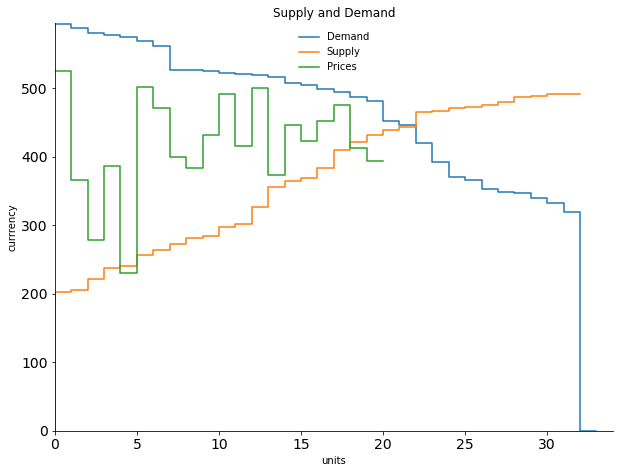

      equilibrium price range is 444 to 446
      average price = 417.95
      equilibrium expected contracts = 22, actual contracts = 20
      buyer surplus = 2231, seller surplus = 2230
      actual_surplus = 4461, maximum surplus = 4564
      efficiency = 97.74%.



In [6]:
pr1 = pr.ProcessResults(market, sim_name, agents, contracts, debug)
pr1.plot_prices()
pr1.get_results()
pr1.display_results()


## Step three - Set up folder 


In [ ]:
# Set up folder and run simulation

def clear_make_path(name):
    # delete all files if folder exists
    if os.path.exists(name):      
        for files in os.listdir(name):
            file = name +'/' + files
            os.remove(file)
    # create new folder to store result(dict)
    if not os.path.exists(name):  
        os.makedirs(name)

clear_make_path(sim_name)
print(f"folder {sim_name} is ready for data")


## Step Three - Set up treatments

In [15]:
treatments = {
    'grid_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}


# Dump controls and treatments tp json file
# sim_config = {'controls': controls, 'treatments': treatments}
# json.dump(sim_config, open(sim_name + '/config.json', "w"))

In [14]:
treatments = {
    'grid_size': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}


In [10]:
treatments = {
    'grid_size': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}


In [8]:
treatments = {
    'grid_size': [1]
}


In [44]:
treatments = {
    'num_periods': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}


In [15]:
def chk(x, index):
    typ = type(x)
    assert typ == int or typ == list, "bad type"
    if type(x) == int:
        return x
    elif type(x) == list:
        return x[index]
        
def map_controls(controls, treat_number):
    num_weeks = chk(controls['num_weeks'], treat_number)
    num_periods = chk(controls['num_periods'], treat_number)
    num_rounds = chk(controls['num_rounds'], treat_number)
    grid_sizes = chk(controls['grid_size'], treat_number)
    num_traders = chk(controls['num_traders'], treat_number)
    num_units = chk(controls['num_units'], treat_number)
    lower_bound = chk(controls['lower_bound'], treat_number)
    upper_bound = chk(controls['upper_bound'], treat_number)
    num_trials = chk(controls['num_trials'], treat_number)
    return (num_weeks)
   
def make_simulation(controls, treat_key):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
    """ 
    treat_number = 0
    num_weeks = chk(controls['num_weeks'], treat_number)
    num_periods = chk(controls['num_periods'], treat_number)
    num_rounds = chk(controls['num_rounds'], treat_number)
    grid_sizes = chk(controls['grid_size'], treat_number)
    num_traders = chk(controls['num_traders'], treat_number)
    num_units = chk(controls['num_units'], treat_number)
    lower_bound = chk(controls['lower_bound'], treat_number)
    upper_bound = chk(controls['upper_bound'], treat_number)
    num_trials = chk(controls['num_trials'], treat_number)

    effs = []
    
    for k, treat in enumerate(controls[treat_key]):
        subeffs = []
        for trial in range(num_trials):
            subeffs.append(0)
        effs.append(subeffs)

    for trial in range(num_trials):
        for index, treat in enumerate(controls[treat_key]):
            
            # collect controls
            num_periods = chk(controls['num_periods'], index)
            num_rounds = chk(controls['num_rounds'], index)
            grid_size = chk(controls['grid_size'], index)
            num_traders = chk(controls['num_traders'], index)
            num_units = chk(controls['num_units'], index)
            lower_bound = chk(controls['lower_bound'], index)
            upper_bound = chk(controls['upper_bound'], index)
            
            # make agents
            agent_maker = mkt.MakeAgents(num_traders, trader_objects, num_units, 
                                        grid_size, lower_bound, upper_bound, debug)
            agent_maker.make_agents()
            agent_maker.set_locations(grid_size)
            agents = agent_maker.get_agents()

            # set up market
            agent_maker.make_market("test_market")
            market = agent_maker.get_market()
          
            # run sim
            contracts = []
            week = 1  # TODO Remove these
            period = 1
            sim_agents = copy.deepcopy(agents)  # reinitialize
            sim1 = simp.SimPeriod(sim_name, week, period, num_rounds, sim_agents, 
                   market, grid_size, debug, plot_on)
            for period in range(num_periods):
                sim1.run_period()
                contracts.extend(sim1.get_contracts())
                
            # process results
            pr1 = pr.ProcessResults(market, sim_name, agents, contracts, debug)
            pr1.get_results()
            effs[index][trial] = pr1.get_efficiency()
    return effs

def print_contracts(contracts):
    print("CONTRACTS:")
    print("rnd, b_cu:b_val -price- s_cos:s_cu  buyer_id, seller_id")
    print("-------------------------------------------------------")
    for contract in contracts:
        round = contract[0]
        price = contract[1]
        buyer = contract[2]
        seller = contract[3]
        b_cur = contract[4]
        b_val = contract[5]
        s_cur = contract[6]
        s_cos = contract[7]
        print(f"{round:2} {b_cur:3}:{b_val:4} -{price:4}-{s_cos:4}{s_cur:3}    {buyer:10} {seller:10}")



### Try small decentralized run here

In [26]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [ZIDP, ZIDP]     # List of artificial traders, length 2, can be same
sim_name = "dm_zidp_30_20_100"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'num_rounds': 1,
    'grid_size': 1,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 50
}

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZIDP traders"
data_table = make_simulation(controls, key)


('BID', 570) ('ASK', 302) ('ASK', 339) ('ASK', 335) ('BID', 334) ('ASK', 262) ('BID', 242) ('BID', 259) ('ASK', 599) ('BID', 483) 
(0, 262, 'B_2_ZIDP', 'S_3_ZIDP', 0, 593, 0, 207)
(0, 483, 'B_4_ZIDP', 'S_2_ZIDP', 0, 581, 0, 214)
(0, 335, 'B_4_ZIDP', 'S_4_ZIDP', 1, 566, 0, 232)
('BID', 558) ('BID', 537) ('ASK', 225) ('ASK', 402) ('BID', 453) ('BID', 535) ('ASK', 596) ('BID', 347) ('ASK', 338) ('ASK', 250) 
(0, 225, 'B_3_ZIDP', 'S_4_ZIDP', 0, 595, 0, 210)
(0, 250, 'B_4_ZIDP', 'S_2_ZIDP', 0, 584, 0, 231)
(0, 535, 'B_5_ZIDP', 'S_4_ZIDP', 0, 561, 1, 243)
(0, 453, 'B_1_ZIDP', 'S_3_ZIDP', 0, 559, 0, 244)
(0, 338, 'B_5_ZIDP', 'S_5_ZIDP', 1, 551, 0, 227)
('ASK', 557) ('ASK', 586) ('ASK', 338) ('ASK', 571) ('BID', 218) ('BID', 285) ('BID', 297) ('BID', 281) ('ASK', 510) ('BID', 511) 
(0, 511, 'B_1_ZIDP', 'S_2_ZIDP', 1, 538, 1, 284)
(0, 338, 'B_4_ZIDP', 'S_3_ZIDP', 1, 559, 1, 270)
(0, 510, 'B_3_ZIDP', 'S_1_ZIDP', 1, 540, 0, 245)
('BID', 321) ('ASK', 404) ('BID', 428) ('ASK', 516) ('ASK', 325) ('B

('BID', 323) ('ASK', 397) ('BID', 331) ('ASK', 411) ('BID', 291) ('ASK', 594) ('BID', 418) ('BID', 263) ('ASK', 586) ('ASK', 585) 
(0, 418, 'B_1_ZIDP', 'S_4_ZIDP', 4, 496, 4, 386)
('BID', 358) ('BID', 388) ('ASK', 370) ('ASK', 581) ('ASK', 516) ('ASK', 524) ('BID', 302) ('BID', 273) ('BID', 378) ('ASK', 472) 
(0, 388, 'B_3_ZIDP', 'S_2_ZIDP', 4, 536, 4, 316)
(0, 370, 'B_1_ZIDP', 'S_3_ZIDP', 5, 492, 3, 367)
('BID', 346) None ('BID', 351) ('ASK', 549) ('ASK', 567) ('ASK', 483) ('BID', 303) ('ASK', 565) ('BID', 349) ('ASK', 582) 
('BID', 205) ('ASK', 439) ('ASK', 461) ('BID', 489) ('BID', 242) ('ASK', 298) ('ASK', 562) ('BID', 255) ('BID', 245) ('ASK', 571) 
(0, 489, 'B_5_ZIDP', 'S_2_ZIDP', 0, 525, 0, 270)
(0, 298, 'B_1_ZIDP', 'S_1_ZIDP', 0, 560, 0, 291)
('BID', 366) ('BID', 478) ('ASK', 243) ('ASK', 583) ('ASK', 561) ('ASK', 524) ('BID', 412) ('ASK', 575) ('BID', 280) ('BID', 247) 
(0, 243, 'B_4_ZIDP', 'S_2_ZIDP', 0, 600, 0, 239)
(0, 524, 'B_1_ZIDP', 'S_3_ZIDP', 0, 600, 0, 263)
('ASK', 57

('ASK', 446) ('BID', 406) ('BID', 263) ('ASK', 552) ('ASK', 575) ('ASK', 494) ('ASK', 562) ('BID', 270) ('BID', 312) ('BID', 329) 
(0, 406, 'B_3_ZIDP', 'S_5_ZIDP', 2, 540, 2, 371)
('ASK', 363) ('BID', 286) ('ASK', 463) ('BID', 317) ('BID', 505) ('ASK', 460) ('BID', 408) ('ASK', 466) ('BID', 311) ('ASK', 432) 
(0, 505, 'B_3_ZIDP', 'S_2_ZIDP', 3, 538, 2, 360)
(0, 432, 'B_4_ZIDP', 'S_1_ZIDP', 3, 454, 1, 362)
('BID', 214) ('BID', 417) ('BID', 259) ('ASK', 545) ('ASK', 396) ('ASK', 275) ('BID', 439) ('BID', 435) ('ASK', 490) ('ASK', 594) 
(0, 275, 'B_4_ZIDP', 'S_2_ZIDP', 0, 440, 0, 241)
(0, 396, 'B_1_ZIDP', 'S_5_ZIDP', 0, 600, 0, 263)
(0, 439, 'B_2_ZIDP', 'S_1_ZIDP', 0, 562, 0, 291)
(0, 435, 'B_5_ZIDP', 'S_4_ZIDP', 0, 471, 0, 211)
('BID', 322) ('BID', 327) ('ASK', 491) ('ASK', 486) ('BID', 330) ('ASK', 556) ('BID', 251) ('ASK', 566) ('BID', 381) ('ASK', 507) 
(0, 381, 'B_1_ZIDP', 'S_2_ZIDP', 1, 541, 1, 241)
(0, 330, 'B_5_ZIDP', 'S_1_ZIDP', 1, 469, 1, 305)
('ASK', 533) ('BID', 344) ('BID', 2

('ASK', 473) ('ASK', 512) ('BID', 214) ('ASK', 291) ('BID', 487) ('BID', 569) ('BID', 520) ('BID', 437) ('ASK', 450) ('ASK', 325) 
(0, 569, 'B_1_ZIDP', 'S_4_ZIDP', 0, 600, 0, 212)
(0, 291, 'B_2_ZIDP', 'S_3_ZIDP', 0, 535, 0, 203)
(0, 325, 'B_5_ZIDP', 'S_2_ZIDP', 0, 597, 0, 292)
(0, 450, 'B_1_ZIDP', 'S_5_ZIDP', 1, 580, 0, 241)
(0, 520, 'B_3_ZIDP', 'S_5_ZIDP', 0, 589, 1, 246)
('BID', 465) ('BID', 352) ('ASK', 572) ('ASK', 366) ('ASK', 376) ('BID', 385) ('ASK', 500) ('BID', 315) ('BID', 361) ('ASK', 403) 
(0, 366, 'B_4_ZIDP', 'S_2_ZIDP', 0, 569, 1, 333)
(0, 376, 'B_2_ZIDP', 'S_1_ZIDP', 1, 512, 0, 203)
(0, 385, 'B_5_ZIDP', 'S_2_ZIDP', 1, 456, 2, 352)
(0, 361, 'B_3_ZIDP', 'S_3_ZIDP', 1, 584, 1, 245)
(0, 403, 'B_1_ZIDP', 'S_5_ZIDP', 2, 501, 2, 296)
('ASK', 386) ('BID', 337) ('ASK', 286) ('BID', 349) ('ASK', 287) ('BID', 274) ('BID', 380) ('ASK', 567) ('BID', 236) ('ASK', 316) 
(0, 286, 'B_3_ZIDP', 'S_1_ZIDP', 0, 528, 0, 251)
(0, 380, 'B_4_ZIDP', 'S_5_ZIDP', 0, 424, 0, 245)
(0, 316, 'B_2_ZIDP'

('BID', 285) ('BID', 213) ('BID', 404) ('ASK', 429) ('ASK', 598) ('BID', 275) ('BID', 353) ('ASK', 545) ('ASK', 525) ('ASK', 552) 
('BID', 339) ('ASK', 585) ('BID', 390) ('BID', 339) ('ASK', 540) ('ASK', 590) ('ASK', 585) ('BID', 209) ('ASK', 481) ('BID', 203) 
(0, 390, 'B_3_ZIDP', 'S_4_ZIDP', 4, 443, 3, 377)
('BID', 240) ('ASK', 435) ('ASK', 520) ('BID', 354) ('ASK', 494) ('ASK', 552) ('BID', 381) ('BID', 329) ('ASK', 421) ('BID', 233) 
('ASK', 546) ('BID', 446) ('BID', 254) ('BID', 482) ('BID', 379) ('BID', 384) ('ASK', 417) ('ASK', 304) ('ASK', 423) ('ASK', 561) 
(0, 304, 'B_5_ZIDP', 'S_1_ZIDP', 0, 567, 0, 268)
(0, 417, 'B_1_ZIDP', 'S_5_ZIDP', 0, 574, 0, 233)
(0, 423, 'B_3_ZIDP', 'S_3_ZIDP', 0, 584, 0, 218)
(0, 384, 'B_4_ZIDP', 'S_4_ZIDP', 0, 592, 0, 209)
('BID', 554) ('ASK', 414) ('ASK', 345) ('BID', 229) ('ASK', 311) ('BID', 457) ('BID', 447) ('ASK', 491) ('ASK', 404) ('BID', 386) 
(0, 554, 'B_3_ZIDP', 'S_5_ZIDP', 1, 572, 1, 238)
(0, 311, 'B_5_ZIDP', 'S_3_ZIDP', 1, 562, 1, 263)
(0

(0, 428, 'B_5_ZIDP', 'S_5_ZIDP', 1, 545, 3, 337)
(0, 417, 'B_1_ZIDP', 'S_1_ZIDP', 1, 488, 3, 347)
('ASK', 466) ('ASK', 527) ('ASK', 471) ('BID', 335) ('BID', 420) ('ASK', 507) ('BID', 478) ('ASK', 345) ('BID', 585) ('BID', 499) 
(0, 585, 'B_1_ZIDP', 'S_5_ZIDP', 0, 591, 0, 203)
(0, 499, 'B_4_ZIDP', 'S_2_ZIDP', 0, 535, 0, 309)
(0, 478, 'B_3_ZIDP', 'S_1_ZIDP', 0, 518, 0, 200)
(0, 345, 'B_5_ZIDP', 'S_3_ZIDP', 0, 522, 0, 281)
('ASK', 426) ('BID', 325) ('ASK', 440) ('ASK', 339) ('ASK', 539) ('BID', 286) ('BID', 414) ('BID', 389) ('BID', 488) ('ASK', 584) 
(0, 488, 'B_2_ZIDP', 'S_5_ZIDP', 0, 543, 1, 262)
(0, 339, 'B_5_ZIDP', 'S_4_ZIDP', 1, 493, 0, 281)
(0, 414, 'B_1_ZIDP', 'S_2_ZIDP', 1, 505, 1, 355)
('ASK', 439) ('ASK', 261) ('ASK', 522) ('BID', 368) ('BID', 236) ('ASK', 600) ('ASK', 452) ('BID', 402) ('BID', 465) ('BID', 485) 
(0, 485, 'B_4_ZIDP', 'S_1_ZIDP', 1, 517, 1, 216)
(0, 465, 'B_3_ZIDP', 'S_5_ZIDP', 1, 510, 2, 361)
('BID', 261) ('BID', 434) ('BID', 226) ('BID', 375) ('ASK', 513) ('A

('ASK', 511) ('ASK', 237) ('ASK', 288) ('BID', 498) ('BID', 265) ('BID', 231) ('ASK', 477) ('BID', 426) ('BID', 416) ('ASK', 434) 
(0, 498, 'B_5_ZIDP', 'S_2_ZIDP', 0, 523, 0, 200)
(0, 237, 'B_5_ZIDP', 'S_4_ZIDP', 1, 445, 0, 205)
(0, 288, 'B_2_ZIDP', 'S_5_ZIDP', 0, 557, 0, 241)
('ASK', 405) ('BID', 402) ('BID', 277) ('ASK', 304) ('BID', 332) ('ASK', 513) ('BID', 259) ('ASK', 368) ('ASK', 405) ('BID', 290) 
(0, 304, 'B_3_ZIDP', 'S_4_ZIDP', 0, 547, 1, 241)
(0, 368, 'B_4_ZIDP', 'S_2_ZIDP', 0, 551, 1, 228)
('ASK', 443) ('ASK', 488) ('BID', 563) ('ASK', 576) ('BID', 261) ('ASK', 314) ('ASK', 398) ('BID', 541) ('BID', 239) ('BID', 234) 
(0, 563, 'B_1_ZIDP', 'S_3_ZIDP', 0, 573, 0, 264)
(0, 314, 'B_1_ZIDP', 'S_4_ZIDP', 1, 550, 0, 203)
(0, 541, 'B_5_ZIDP', 'S_1_ZIDP', 0, 544, 0, 237)
(0, 261, 'B_2_ZIDP', 'S_5_ZIDP', 0, 598, 0, 204)
('BID', 307) ('BID', 269) ('ASK', 366) ('ASK', 415) ('ASK', 503) ('BID', 491) ('BID', 239) ('ASK', 425) ('ASK', 241) ('BID', 442) 
(0, 241, 'B_1_ZIDP', 'S_4_ZIDP', 2,

('ASK', 564) ('ASK', 507) ('ASK', 524) ('ASK', 348) ('BID', 307) ('BID', 414) ('BID', 353) ('BID', 335) ('BID', 263) ('ASK', 575) 
(0, 414, 'B_4_ZIDP', 'S_3_ZIDP', 3, 414, 2, 342)
('BID', 339) ('ASK', 451) ('ASK', 327) ('BID', 355) ('ASK', 425) ('ASK', 557) ('BID', 251) ('BID', 333) ('BID', 244) ('ASK', 520) 
(0, 327, 'B_5_ZIDP', 'S_1_ZIDP', 2, 461, 2, 315)
('ASK', 428) ('BID', 428) ('ASK', 414) ('BID', 221) ('ASK', 582) ('BID', 361) ('BID', 344) ('ASK', 445) ('BID', 294) ('ASK', 438) 
(0, 428, 'B_5_ZIDP', 'S_1_ZIDP', 3, 433, 3, 322)
(0, 428, 'B_3_ZIDP', 'S_2_ZIDP', 2, 510, 3, 406)
('BID', 268) ('ASK', 465) ('ASK', 471) ('BID', 302) ('ASK', 480) ('ASK', 486) ('BID', 234) ('ASK', 519) ('BID', 285) ('BID', 375) 
('ASK', 590) ('BID', 337) ('BID', 204) ('ASK', 572) ('ASK', 481) ('BID', 259) ('ASK', 592) ('BID', 360) ('ASK', 548) ('BID', 240) 
('BID', 426) ('BID', 430) ('BID', 502) ('BID', 405) ('ASK', 528) ('ASK', 300) ('ASK', 329) ('BID', 272) ('ASK', 259) ('ASK', 302) 
(0, 259, 'B_5_ZIDP

('BID', 501) ('ASK', 562) ('ASK', 369) ('BID', 287) ('ASK', 497) ('ASK', 336) ('BID', 209) ('BID', 451) ('ASK', 513) ('BID', 280) 
(0, 501, 'B_5_ZIDP', 'S_1_ZIDP', 2, 548, 3, 342)
(0, 336, 'B_3_ZIDP', 'S_4_ZIDP', 2, 462, 2, 302)
(0, 451, 'B_4_ZIDP', 'S_5_ZIDP', 2, 478, 1, 233)
('BID', 324) ('ASK', 421) ('BID', 436) ('ASK', 556) ('BID', 318) ('BID', 342) ('ASK', 493) ('ASK', 400) ('ASK', 479) ('BID', 409) 
(0, 436, 'B_2_ZIDP', 'S_1_ZIDP', 1, 503, 4, 370)
('BID', 264) ('ASK', 561) ('BID', 357) ('BID', 312) ('ASK', 558) ('ASK', 548) ('ASK', 567) ('ASK', 429) ('BID', 366) ('BID', 311) 
(0, 429, 'B_4_ZIDP', 'S_2_ZIDP', 3, 458, 2, 391)
('ASK', 302) ('BID', 426) ('BID', 413) ('ASK', 237) ('ASK', 476) ('ASK', 429) ('BID', 220) ('BID', 328) ('ASK', 510) ('BID', 317) 
(0, 237, 'B_1_ZIDP', 'S_1_ZIDP', 0, 586, 0, 224)
(0, 302, 'B_3_ZIDP', 'S_5_ZIDP', 0, 589, 0, 254)
(0, 429, 'B_5_ZIDP', 'S_4_ZIDP', 0, 578, 0, 285)
('ASK', 434) ('BID', 282) ('ASK', 320) ('ASK', 298) ('ASK', 366) ('BID', 304) ('BID'

('ASK', 257) ('BID', 429) ('BID', 307) ('BID', 300) ('ASK', 319) ('ASK', 468) ('ASK', 426) ('BID', 291) ('ASK', 525) ('BID', 303) 
(0, 257, 'B_5_ZIDP', 'S_3_ZIDP', 0, 580, 0, 215)
(0, 319, 'B_3_ZIDP', 'S_1_ZIDP', 0, 570, 0, 248)
(0, 426, 'B_1_ZIDP', 'S_5_ZIDP', 0, 564, 0, 273)
('ASK', 452) ('ASK', 298) ('ASK', 370) ('BID', 517) ('BID', 408) ('ASK', 514) ('BID', 312) ('BID', 233) ('BID', 203) ('ASK', 569) 
(0, 517, 'B_2_ZIDP', 'S_5_ZIDP', 0, 526, 1, 278)
(0, 408, 'B_5_ZIDP', 'S_1_ZIDP', 1, 578, 1, 289)
(0, 312, 'B_3_ZIDP', 'S_3_ZIDP', 1, 535, 1, 290)
(0, 298, 'B_3_ZIDP', 'S_4_ZIDP', 2, 414, 0, 296)
('BID', 482) ('ASK', 457) ('BID', 343) ('ASK', 301) ('ASK', 473) ('BID', 426) ('ASK', 556) ('ASK', 369) ('BID', 377) ('BID', 373) 
(0, 301, 'B_4_ZIDP', 'S_3_ZIDP', 0, 586, 2, 296)
(0, 426, 'B_2_ZIDP', 'S_2_ZIDP', 1, 490, 0, 202)
(0, 369, 'B_5_ZIDP', 'S_1_ZIDP', 2, 544, 2, 328)
('ASK', 359) ('ASK', 457) ('BID', 394) ('BID', 297) ('ASK', 459) ('BID', 476) ('ASK', 463) ('ASK', 365) ('BID', 573) 

('ASK', 588) ('BID', 266) ('BID', 382) ('BID', 313) ('ASK', 523) ('BID', 325) ('BID', 272) ('ASK', 504) ('ASK', 452) ('ASK', 499) 
(0, 382, 'B_3_ZIDP', 'S_5_ZIDP', 4, 444, 2, 348)
('BID', 258) ('ASK', 506) ('BID', 273) ('BID', 301) ('ASK', 472) ('BID', 400) ('ASK', 478) ('ASK', 361) ('ASK', 459) ('BID', 360) 
(0, 361, 'B_5_ZIDP', 'S_3_ZIDP', 1, 483, 2, 292)
('BID', 346) ('BID', 299) ('ASK', 445) ('BID', 425) ('ASK', 583) ('BID', 251) ('BID', 309) ('ASK', 595) ('ASK', 485) ('ASK', 480) 
(0, 425, 'B_2_ZIDP', 'S_2_ZIDP', 2, 431, 3, 327)
('BID', 250) ('BID', 343) ('ASK', 545) ('BID', 227) ('BID', 304) ('ASK', 440) ('ASK', 440) ('BID', 248) ('ASK', 597) ('ASK', 576) 
(0, 343, 'B_3_ZIDP', 'S_3_ZIDP', 5, 395, 3, 336)
('ASK', 492) ('ASK', 398) ('BID', 264) ('BID', 313) ('ASK', 425) ('ASK', 516) None ('BID', 213) ('BID', 271) ('ASK', 537) 
('ASK', 396) ('ASK', 446) ('BID', 329) ('ASK', 455) ('BID', 557) ('BID', 212) ('ASK', 565) ('ASK', 275) ('BID', 300) ('BID', 506) 
(0, 557, 'B_5_ZIDP', 'S_5_

('BID', 323) ('ASK', 349) ('ASK', 462) ('BID', 477) ('BID', 571) ('BID', 402) ('ASK', 232) ('ASK', 363) ('ASK', 279) ('BID', 263) 
(0, 232, 'B_1_ZIDP', 'S_3_ZIDP', 0, 513, 0, 200)
(0, 571, 'B_5_ZIDP', 'S_5_ZIDP', 0, 585, 0, 225)
(0, 477, 'B_3_ZIDP', 'S_1_ZIDP', 0, 533, 0, 212)
(0, 279, 'B_3_ZIDP', 'S_2_ZIDP', 1, 530, 0, 207)
(0, 363, 'B_5_ZIDP', 'S_4_ZIDP', 1, 558, 0, 211)
('BID', 509) ('BID', 210) ('ASK', 354) ('BID', 336) ('ASK', 323) ('BID', 249) ('ASK', 323) ('BID', 230) ('ASK', 587) ('ASK', 467) 
(0, 323, 'B_2_ZIDP', 'S_5_ZIDP', 0, 591, 1, 256)
(0, 323, 'B_1_ZIDP', 'S_2_ZIDP', 1, 436, 1, 240)
(0, 354, 'B_4_ZIDP', 'S_1_ZIDP', 0, 528, 1, 224)
('BID', 408) ('ASK', 388) ('ASK', 531) ('ASK', 427) ('ASK', 498) ('BID', 521) ('BID', 280) ('ASK', 373) ('BID', 352) ('BID', 479) 
(0, 521, 'B_4_ZIDP', 'S_2_ZIDP', 1, 525, 2, 343)
(0, 479, 'B_2_ZIDP', 'S_4_ZIDP', 1, 509, 1, 237)
(0, 373, 'B_1_ZIDP', 'S_3_ZIDP', 2, 394, 1, 243)
(0, 388, 'B_5_ZIDP', 'S_5_ZIDP', 2, 518, 2, 310)
('BID', 387) ('ASK'

('ASK', 421) ('BID', 270) ('ASK', 374) ('ASK', 528) ('BID', 491) ('ASK', 585) ('BID', 411) ('BID', 275) ('BID', 425) ('ASK', 381) 
(0, 491, 'B_5_ZIDP', 'S_2_ZIDP', 1, 527, 1, 218)
(0, 374, 'B_2_ZIDP', 'S_3_ZIDP', 1, 463, 0, 238)
(0, 425, 'B_4_ZIDP', 'S_3_ZIDP', 0, 533, 1, 269)
(0, 381, 'B_1_ZIDP', 'S_1_ZIDP', 1, 450, 2, 319)
('BID', 379) ('ASK', 550) ('ASK', 378) ('ASK', 493) ('ASK', 471) ('BID', 323) ('BID', 354) ('ASK', 371) ('BID', 411) ('BID', 250) 
(0, 411, 'B_1_ZIDP', 'S_5_ZIDP', 2, 436, 1, 243)
(0, 371, 'B_3_ZIDP', 'S_4_ZIDP', 1, 516, 0, 224)
(0, 379, 'B_5_ZIDP', 'S_4_ZIDP', 2, 437, 1, 235)
('BID', 345) ('ASK', 514) ('ASK', 482) ('BID', 334) ('BID', 450) ('BID', 200) ('BID', 219) ('ASK', 245) ('ASK', 555) ('ASK', 411) 
(0, 245, 'B_5_ZIDP', 'S_2_ZIDP', 3, 407, 2, 235)
(0, 411, 'B_1_ZIDP', 'S_1_ZIDP', 3, 424, 3, 402)
(0, 450, 'B_2_ZIDP', 'S_2_ZIDP', 2, 450, 3, 240)
('BID', 269) ('ASK', 526) ('BID', 489) ('ASK', 409) ('BID', 475) ('BID', 215) ('BID', 464) ('ASK', 416) ('ASK', 593) 

('BID', 391) ('ASK', 595) ('ASK', 389) ('BID', 277) ('BID', 204) ('ASK', 600) ('BID', 296) ('BID', 518) ('ASK', 512) ('ASK', 350) 
(0, 350, 'B_1_ZIDP', 'S_4_ZIDP', 1, 584, 0, 250)
(0, 518, 'B_5_ZIDP', 'S_1_ZIDP', 0, 573, 1, 324)
(0, 389, 'B_5_ZIDP', 'S_5_ZIDP', 1, 541, 1, 253)
('ASK', 437) ('ASK', 497) ('ASK', 342) ('BID', 266) ('BID', 202) ('BID', 441) ('ASK', 449) ('ASK', 343) ('BID', 226) ('BID', 407) 
(0, 441, 'B_1_ZIDP', 'S_2_ZIDP', 2, 517, 1, 278)
(0, 407, 'B_2_ZIDP', 'S_1_ZIDP', 1, 495, 2, 326)
(0, 343, 'B_5_ZIDP', 'S_3_ZIDP', 2, 507, 1, 292)
('ASK', 378) ('BID', 247) ('BID', 206) ('ASK', 352) ('BID', 339) ('ASK', 419) ('ASK', 523) ('BID', 428) ('BID', 302) ('ASK', 381) 
(0, 352, 'B_5_ZIDP', 'S_2_ZIDP', 3, 481, 2, 297)
(0, 378, 'B_1_ZIDP', 'S_5_ZIDP', 3, 459, 2, 317)
(0, 428, 'B_3_ZIDP', 'S_2_ZIDP', 1, 449, 3, 357)
('BID', 433) ('ASK', 545) ('BID', 267) ('ASK', 520) ('ASK', 537) ('ASK', 352) ('BID', 377) ('ASK', 497) ('BID', 289) ('BID', 285) 
(0, 352, 'B_1_ZIDP', 'S_4_ZIDP', 4,

('ASK', 362) ('ASK', 450) ('BID', 203) ('BID', 376) ('ASK', 526) ('BID', 469) ('BID', 271) ('ASK', 365) ('ASK', 571) ('BID', 253) 
(0, 469, 'B_2_ZIDP', 'S_1_ZIDP', 2, 535, 2, 355)
(0, 365, 'B_3_ZIDP', 'S_4_ZIDP', 0, 446, 3, 313)
('BID', 456) ('ASK', 596) ('BID', 416) ('ASK', 337) ('ASK', 482) ('ASK', 457) ('BID', 441) ('BID', 208) ('BID', 346) ('ASK', 278) 
(0, 278, 'B_4_ZIDP', 'S_2_ZIDP', 2, 475, 0, 238)
(0, 337, 'B_2_ZIDP', 'S_5_ZIDP', 3, 494, 2, 333)
(0, 441, 'B_5_ZIDP', 'S_5_ZIDP', 2, 470, 3, 348)
('BID', 388) ('BID', 309) ('BID', 313) ('ASK', 527) ('BID', 271) ('ASK', 591) ('ASK', 537) ('ASK', 497) ('ASK', 556) ('BID', 250) 
('ASK', 582) ('ASK', 270) ('ASK', 336) ('BID', 465) ('BID', 390) ('ASK', 277) ('BID', 283) ('BID', 242) ('BID', 219) ('ASK', 399) 
(0, 465, 'B_4_ZIDP', 'S_5_ZIDP', 0, 571, 0, 270)
(0, 270, 'B_5_ZIDP', 'S_1_ZIDP', 0, 501, 0, 213)
(0, 277, 'B_3_ZIDP', 'S_2_ZIDP', 0, 542, 0, 222)
(0, 336, 'B_1_ZIDP', 'S_3_ZIDP', 0, 588, 0, 306)
(0, 399, 'B_2_ZIDP', 'S_4_ZIDP', 0,

('BID', 391) ('BID', 508) ('BID', 216) ('ASK', 461) ('ASK', 363) ('ASK', 405) ('ASK', 580) ('ASK', 439) ('BID', 507) ('BID', 462) 
(0, 363, 'B_1_ZIDP', 'S_1_ZIDP', 0, 591, 0, 228)
(0, 405, 'B_4_ZIDP', 'S_2_ZIDP', 0, 578, 0, 297)
(0, 508, 'B_3_ZIDP', 'S_1_ZIDP', 0, 585, 1, 277)
(0, 507, 'B_5_ZIDP', 'S_2_ZIDP', 0, 596, 1, 331)
('ASK', 548) ('BID', 395) ('ASK', 570) ('BID', 408) ('BID', 340) ('ASK', 528) ('BID', 473) ('BID', 221) ('ASK', 499) ('ASK', 500) 
(0, 473, 'B_5_ZIDP', 'S_4_ZIDP', 1, 525, 0, 252)
(0, 408, 'B_4_ZIDP', 'S_1_ZIDP', 1, 513, 2, 311)
('BID', 292) ('ASK', 450) ('ASK', 362) ('ASK', 562) ('ASK', 427) ('BID', 391) ('ASK', 375) ('BID', 450) ('BID', 362) ('BID', 475) 
(0, 362, 'B_3_ZIDP', 'S_3_ZIDP', 1, 461, 0, 312)
(0, 475, 'B_5_ZIDP', 'S_5_ZIDP', 2, 488, 0, 255)
(0, 450, 'B_1_ZIDP', 'S_2_ZIDP', 1, 566, 2, 355)
(0, 375, 'B_4_ZIDP', 'S_4_ZIDP', 2, 454, 1, 323)
('ASK', 307) ('ASK', 277) ('ASK', 593) ('BID', 285) ('BID', 451) ('BID', 368) ('BID', 293) ('ASK', 325) ('BID', 218) 

('ASK', 250) ('BID', 282) ('BID', 343) ('BID', 384) ('ASK', 457) ('ASK', 234) ('BID', 566) ('ASK', 275) ('BID', 489) ('ASK', 403) 
(0, 566, 'B_4_ZIDP', 'S_2_ZIDP', 0, 583, 0, 200)
(0, 234, 'B_2_ZIDP', 'S_4_ZIDP', 0, 592, 0, 224)
(0, 275, 'B_3_ZIDP', 'S_5_ZIDP', 0, 597, 0, 275)
(0, 489, 'B_1_ZIDP', 'S_1_ZIDP', 0, 584, 0, 273)
('BID', 239) ('ASK', 337) ('BID', 516) ('BID', 323) ('ASK', 547) ('ASK', 377) ('BID', 204) ('ASK', 457) ('BID', 561) ('ASK', 521) 
(0, 337, 'B_2_ZIDP', 'S_5_ZIDP', 1, 421, 1, 287)
(0, 561, 'B_4_ZIDP', 'S_5_ZIDP', 1, 564, 2, 366)
(0, 377, 'B_5_ZIDP', 'S_2_ZIDP', 0, 579, 1, 238)
(0, 457, 'B_1_ZIDP', 'S_1_ZIDP', 1, 537, 1, 333)
('BID', 393) ('ASK', 379) ('BID', 227) ('ASK', 279) ('ASK', 527) ('BID', 432) ('ASK', 474) ('BID', 227) ('ASK', 407) ('BID', 253) 
(0, 279, 'B_1_ZIDP', 'S_4_ZIDP', 2, 536, 1, 250)
(0, 379, 'B_4_ZIDP', 'S_2_ZIDP', 2, 522, 2, 245)
(0, 407, 'B_5_ZIDP', 'S_5_ZIDP', 1, 530, 3, 383)
('BID', 401) ('BID', 396) ('BID', 298) ('ASK', 476) ('BID', 306) ('B

('BID', 500) ('ASK', 595) ('ASK', 570) ('ASK', 401) ('BID', 281) ('BID', 276) ('BID', 365) ('BID', 306) ('ASK', 556) ('ASK', 546) 
(0, 401, 'B_1_ZIDP', 'S_2_ZIDP', 0, 574, 0, 324)
(0, 365, 'B_3_ZIDP', 'S_5_ZIDP', 0, 592, 0, 215)
(0, 306, 'B_2_ZIDP', 'S_4_ZIDP', 0, 520, 0, 221)
('ASK', 447) ('BID', 488) ('ASK', 585) ('ASK', 339) ('BID', 237) ('BID', 465) ('ASK', 522) ('ASK', 431) ('BID', 502) ('BID', 414) 
(0, 502, 'B_3_ZIDP', 'S_3_ZIDP', 1, 561, 0, 240)
(0, 339, 'B_5_ZIDP', 'S_5_ZIDP', 0, 509, 1, 223)
(0, 465, 'B_4_ZIDP', 'S_5_ZIDP', 0, 599, 2, 269)
(0, 431, 'B_4_ZIDP', 'S_1_ZIDP', 1, 542, 0, 327)
(0, 414, 'B_2_ZIDP', 'S_4_ZIDP', 1, 517, 1, 253)
('BID', 296) ('ASK', 393) ('ASK', 392) ('BID', 321) ('ASK', 514) ('ASK', 534) ('ASK', 440) ('BID', 378) ('BID', 394) ('BID', 291) 
(0, 392, 'B_5_ZIDP', 'S_3_ZIDP', 1, 496, 1, 302)
(0, 394, 'B_3_ZIDP', 'S_2_ZIDP', 2, 540, 1, 337)
(0, 378, 'B_2_ZIDP', 'S_4_ZIDP', 2, 451, 2, 340)
(0, 393, 'B_3_ZIDP', 'S_1_ZIDP', 3, 524, 1, 354)
('ASK', 308) ('BID'

(0, 399, 'B_4_ZIDP', 'S_2_ZIDP', 3, 413, 2, 320)
('ASK', 501) ('ASK', 395) ('BID', 257) ('ASK', 565) ('ASK', 566) ('BID', 300) ('ASK', 526) ('BID', 415) ('BID', 327) ('BID', 216) 
(0, 415, 'B_3_ZIDP', 'S_2_ZIDP', 2, 423, 3, 402)
('ASK', 500) ('ASK', 537) ('BID', 295) ('BID', 398) ('BID', 240) ('ASK', 482) ('BID', 263) ('ASK', 517) ('ASK', 510) ('BID', 254) 
(0, 398, 'B_2_ZIDP', 'S_5_ZIDP', 4, 402, 2, 381)
('ASK', 549) ('ASK', 511) ('BID', 223) ('BID', 235) ('ASK', 452) ('BID', 236) ('ASK', 562) ('ASK', 593) ('BID', 328) ('BID', 323) 
(0, 452, 'B_5_ZIDP', 'S_5_ZIDP', 2, 495, 3, 392)
('BID', 378) ('BID', 274) ('ASK', 483) ('BID', 258) ('ASK', 525) ('BID', 354) ('ASK', 567) ('ASK', 415) ('BID', 411) ('ASK', 468) 
('BID', 344) ('BID', 506) ('ASK', 530) ('ASK', 416) ('BID', 405) ('ASK', 553) ('BID', 292) ('BID', 518) ('ASK', 204) ('ASK', 389) 
(0, 204, 'B_3_ZIDP', 'S_4_ZIDP', 0, 561, 0, 201)
(0, 389, 'B_4_ZIDP', 'S_5_ZIDP', 0, 562, 0, 208)
(0, 518, 'B_2_ZIDP', 'S_2_ZIDP', 0, 526, 0, 217)
(0

('ASK', 457) ('BID', 338) ('ASK', 386) ('ASK', 343) ('ASK', 560) ('BID', 427) ('BID', 248) ('ASK', 468) ('BID', 285) ('BID', 321) 
(0, 343, 'B_2_ZIDP', 'S_2_ZIDP', 1, 401, 1, 333)
('BID', 526) ('BID', 217) ('ASK', 293) ('ASK', 497) ('ASK', 489) ('BID', 301) ('ASK', 416) ('BID', 283) ('ASK', 510) ('BID', 207) 
(0, 293, 'B_3_ZIDP', 'S_5_ZIDP', 0, 580, 0, 239)
(0, 416, 'B_4_ZIDP', 'S_3_ZIDP', 2, 533, 1, 334)
(0, 489, 'B_5_ZIDP', 'S_4_ZIDP', 1, 513, 1, 420)
('ASK', 474) ('BID', 300) ('ASK', 491) ('ASK', 472) ('BID', 218) ('BID', 319) ('ASK', 373) ('BID', 379) ('ASK', 573) ('BID', 300) 
(0, 373, 'B_3_ZIDP', 'S_1_ZIDP', 1, 510, 1, 238)
(0, 379, 'B_4_ZIDP', 'S_1_ZIDP', 3, 504, 2, 293)
('BID', 202) ('ASK', 405) ('ASK', 473) ('BID', 360) ('BID', 379) ('BID', 481) ('ASK', 594) ('ASK', 400) ('ASK', 563) ('BID', 244) 
(0, 481, 'B_1_ZIDP', 'S_5_ZIDP', 0, 550, 1, 245)
('BID', 401) ('BID', 208) ('ASK', 549) ('ASK', 502) ('BID', 236) ('ASK', 531) ('BID', 330) ('ASK', 434) ('BID', 356) ('ASK', 568) 
(0

('BID', 276) ('ASK', 306) ('BID', 506) ('ASK', 275) ('ASK', 484) ('ASK', 469) ('BID', 513) ('ASK', 514) ('BID', 428) ('BID', 293) 
(0, 275, 'B_4_ZIDP', 'S_5_ZIDP', 0, 586, 0, 234)
(0, 513, 'B_2_ZIDP', 'S_4_ZIDP', 0, 533, 0, 300)
(0, 469, 'B_5_ZIDP', 'S_1_ZIDP', 0, 523, 0, 260)
(0, 428, 'B_1_ZIDP', 'S_3_ZIDP', 0, 594, 0, 290)
(0, 514, 'B_1_ZIDP', 'S_2_ZIDP', 1, 548, 0, 233)
('ASK', 425) ('ASK', 439) ('ASK', 322) ('BID', 467) ('BID', 214) ('BID', 411) ('BID', 382) ('BID', 413) ('ASK', 303) ('ASK', 494) 
(0, 467, 'B_2_ZIDP', 'S_3_ZIDP', 1, 521, 1, 354)
(0, 413, 'B_3_ZIDP', 'S_1_ZIDP', 0, 557, 1, 283)
(0, 303, 'B_4_ZIDP', 'S_2_ZIDP', 1, 538, 1, 250)
(0, 382, 'B_5_ZIDP', 'S_5_ZIDP', 1, 497, 1, 274)
('ASK', 497) ('ASK', 555) ('BID', 424) ('BID', 364) ('BID', 443) ('ASK', 500) ('BID', 456) ('ASK', 302) ('ASK', 497) ('BID', 371) 
(0, 456, 'B_2_ZIDP', 'S_5_ZIDP', 2, 463, 2, 383)
(0, 443, 'B_5_ZIDP', 'S_2_ZIDP', 2, 453, 2, 329)
(0, 302, 'B_4_ZIDP', 'S_1_ZIDP', 2, 496, 2, 292)
('ASK', 593) ('BID'

('ASK', 401) ('BID', 370) ('BID', 228) ('BID', 239) ('ASK', 402) ('ASK', 391) ('BID', 289) ('ASK', 384) ('BID', 410) ('ASK', 307) 
(0, 307, 'B_2_ZIDP', 'S_3_ZIDP', 3, 482, 1, 274)
(0, 410, 'B_3_ZIDP', 'S_2_ZIDP', 2, 468, 3, 341)
('ASK', 338) ('BID', 358) ('ASK', 425) ('BID', 361) ('ASK', 357) ('BID', 280) ('BID', 403) ('ASK', 390) ('BID', 218) ('ASK', 575) 
(0, 403, 'B_3_ZIDP', 'S_3_ZIDP', 3, 404, 2, 360)
(0, 338, 'B_1_ZIDP', 'S_4_ZIDP', 3, 451, 2, 225)
('BID', 257) ('BID', 333) ('BID', 339) ('BID', 272) ('BID', 411) ('ASK', 530) ('ASK', 445) ('ASK', 597) ('ASK', 318) ('ASK', 431) 
(0, 318, 'B_5_ZIDP', 'S_4_ZIDP', 1, 454, 3, 276)
(0, 411, 'B_4_ZIDP', 'S_5_ZIDP', 2, 477, 3, 339)
(0, 339, 'B_2_ZIDP', 'S_4_ZIDP', 4, 341, 4, 322)
('BID', 213) ('BID', 225) ('BID', 225) ('BID', 204) ('ASK', 550) ('ASK', 584) ('ASK', 389) ('BID', 266) ('ASK', 588) ('ASK', 598) 
(0, 389, 'B_5_ZIDP', 'S_2_ZIDP', 2, 433, 4, 350)
('BID', 296) ('ASK', 456) ('BID', 236) ('ASK', 437) ('ASK', 525) ('BID', 397) ('ASK'

('ASK', 331) ('ASK', 393) ('BID', 332) ('BID', 282) ('BID', 415) ('ASK', 423) ('ASK', 527) ('BID', 265) ('ASK', 519) ('BID', 411) 
(0, 331, 'B_2_ZIDP', 'S_3_ZIDP', 0, 588, 0, 245)
(0, 393, 'B_4_ZIDP', 'S_5_ZIDP', 0, 563, 0, 257)
(0, 423, 'B_5_ZIDP', 'S_2_ZIDP', 0, 592, 0, 301)
('BID', 523) ('ASK', 426) ('BID', 446) ('ASK', 580) ('BID', 387) ('ASK', 367) ('BID', 437) ('ASK', 498) ('BID', 476) ('ASK', 497) 
(0, 367, 'B_1_ZIDP', 'S_5_ZIDP', 0, 592, 1, 280)
(0, 426, 'B_5_ZIDP', 'S_4_ZIDP', 1, 575, 0, 329)
(0, 497, 'B_2_ZIDP', 'S_3_ZIDP', 1, 577, 1, 299)
(0, 476, 'B_3_ZIDP', 'S_1_ZIDP', 0, 535, 0, 348)
('BID', 402) ('ASK', 454) ('ASK', 499) ('BID', 385) ('BID', 440) ('ASK', 415) ('ASK', 560) ('BID', 330) ('ASK', 506) ('BID', 523) 
(0, 415, 'B_3_ZIDP', 'S_4_ZIDP', 1, 533, 1, 333)
(0, 523, 'B_5_ZIDP', 'S_1_ZIDP', 2, 529, 1, 367)
(0, 440, 'B_4_ZIDP', 'S_4_ZIDP', 1, 527, 2, 343)
('BID', 221) ('BID', 335) ('ASK', 514) ('ASK', 525) ('ASK', 501) ('ASK', 559) ('ASK', 589) ('BID', 414) ('BID', 223) 

('BID', 322) ('BID', 384) ('BID', 484) ('BID', 289) ('ASK', 406) ('ASK', 505) ('ASK', 451) ('ASK', 527) ('BID', 242) ('ASK', 414) 
(0, 484, 'B_1_ZIDP', 'S_4_ZIDP', 2, 490, 1, 280)
(0, 384, 'B_3_ZIDP', 'S_5_ZIDP', 1, 400, 2, 280)
('BID', 408) ('ASK', 331) ('BID', 250) ('BID', 402) ('ASK', 550) ('ASK', 541) ('ASK', 537) ('ASK', 495) ('BID', 339) ('BID', 305) 
(0, 331, 'B_5_ZIDP', 'S_1_ZIDP', 0, 593, 0, 244)
(0, 402, 'B_1_ZIDP', 'S_2_ZIDP', 0, 600, 0, 227)
(0, 339, 'B_3_ZIDP', 'S_3_ZIDP', 0, 545, 0, 266)
(0, 305, 'B_2_ZIDP', 'S_4_ZIDP', 0, 592, 0, 217)
('BID', 251) ('BID', 223) ('BID', 512) ('BID', 329) ('BID', 396) ('ASK', 547) ('ASK', 492) ('ASK', 326) ('ASK', 569) ('ASK', 474) 
(0, 326, 'B_3_ZIDP', 'S_5_ZIDP', 1, 545, 0, 208)
(0, 474, 'B_5_ZIDP', 'S_1_ZIDP', 1, 560, 1, 249)
(0, 512, 'B_2_ZIDP', 'S_5_ZIDP', 1, 542, 1, 241)
('ASK', 598) ('BID', 245) ('ASK', 555) ('ASK', 324) ('BID', 438) ('ASK', 455) ('BID', 466) ('BID', 344) ('ASK', 589) ('BID', 420) 
(0, 466, 'B_3_ZIDP', 'S_3_ZIDP', 2,

(0, 415, 'B_5_ZIDP', 'S_3_ZIDP', 3, 428, 2, 304)
('ASK', 537) ('ASK', 530) ('ASK', 527) ('ASK', 562) ('BID', 225) ('ASK', 422) ('BID', 275) ('BID', 276) ('BID', 224) ('BID', 219) 
('ASK', 523) ('BID', 248) ('ASK', 270) ('ASK', 290) ('BID', 406) ('ASK', 534) ('BID', 302) ('ASK', 452) ('BID', 454) ('BID', 517) 
(0, 517, 'B_3_ZIDP', 'S_2_ZIDP', 0, 579, 0, 223)
(0, 270, 'B_5_ZIDP', 'S_1_ZIDP', 0, 590, 0, 261)
(0, 454, 'B_1_ZIDP', 'S_1_ZIDP', 0, 479, 1, 314)
(0, 290, 'B_2_ZIDP', 'S_4_ZIDP', 0, 591, 0, 210)
(0, 302, 'B_4_ZIDP', 'S_5_ZIDP', 0, 573, 0, 202)
('ASK', 412) ('BID', 233) ('BID', 284) ('BID', 515) ('BID', 514) ('ASK', 559) ('ASK', 373) ('ASK', 263) ('ASK', 513) ('BID', 258) 
(0, 515, 'B_5_ZIDP', 'S_1_ZIDP', 1, 540, 2, 368)
(0, 263, 'B_2_ZIDP', 'S_5_ZIDP', 1, 581, 1, 230)
(0, 373, 'B_3_ZIDP', 'S_2_ZIDP', 1, 542, 1, 224)
('BID', 329) ('ASK', 325) ('BID', 201) ('ASK', 326) ('ASK', 576) ('ASK', 489) ('BID', 259) ('ASK', 488) ('BID', 234) ('BID', 252) 
(0, 325, 'B_2_ZIDP', 'S_5_ZIDP', 2,

(0, 306, 'B_4_ZIDP', 'S_2_ZIDP', 1, 376, 0, 204)
(0, 256, 'B_5_ZIDP', 'S_3_ZIDP', 1, 539, 1, 218)
('ASK', 436) ('BID', 520) ('BID', 339) ('ASK', 323) ('BID', 396) ('ASK', 545) ('ASK', 364) ('BID', 327) ('ASK', 289) ('BID', 321) 
(0, 520, 'B_3_ZIDP', 'S_2_ZIDP', 0, 526, 1, 268)
(0, 289, 'B_3_ZIDP', 'S_4_ZIDP', 1, 454, 0, 281)
(0, 396, 'B_5_ZIDP', 'S_3_ZIDP', 2, 498, 2, 223)
(0, 323, 'B_2_ZIDP', 'S_1_ZIDP', 0, 549, 1, 287)
('ASK', 542) ('ASK', 336) ('BID', 359) ('ASK', 535) ('BID', 243) ('ASK', 396) ('BID', 372) ('BID', 319) ('BID', 236) ('ASK', 503) 
(0, 336, 'B_2_ZIDP', 'S_5_ZIDP', 1, 514, 0, 218)
(0, 372, 'B_5_ZIDP', 'S_2_ZIDP', 3, 495, 2, 282)
('BID', 219) ('BID', 421) ('BID', 412) ('ASK', 379) ('ASK', 504) ('BID', 311) ('ASK', 362) ('ASK', 479) ('ASK', 295) ('BID', 275) 
(0, 295, 'B_4_ZIDP', 'S_5_ZIDP', 2, 352, 1, 260)
(0, 362, 'B_1_ZIDP', 'S_1_ZIDP', 0, 570, 2, 312)
(0, 412, 'B_3_ZIDP', 'S_1_ZIDP', 2, 442, 3, 332)
('BID', 241) ('BID', 282) ('ASK', 473) ('BID', 272) ('ASK', 393) ('A

('BID', 328) ('BID', 301) ('BID', 357) ('ASK', 551) ('ASK', 346) ('ASK', 265) ('ASK', 455) ('BID', 330) ('ASK', 357) ('BID', 385) 
(0, 265, 'B_1_ZIDP', 'S_1_ZIDP', 0, 581, 0, 208)
(0, 346, 'B_3_ZIDP', 'S_5_ZIDP', 0, 595, 0, 293)
(0, 385, 'B_4_ZIDP', 'S_1_ZIDP', 0, 559, 1, 225)
(0, 357, 'B_4_ZIDP', 'S_4_ZIDP', 1, 528, 0, 355)
('BID', 284) ('ASK', 563) ('BID', 494) ('BID', 208) ('BID', 498) ('ASK', 582) ('ASK', 489) ('ASK', 423) ('BID', 441) ('ASK', 380) 
(0, 380, 'B_4_ZIDP', 'S_1_ZIDP', 2, 489, 2, 346)
(0, 498, 'B_1_ZIDP', 'S_4_ZIDP', 1, 517, 1, 363)
(0, 423, 'B_3_ZIDP', 'S_2_ZIDP', 1, 510, 0, 201)
(0, 489, 'B_5_ZIDP', 'S_5_ZIDP', 0, 558, 1, 307)
(0, 441, 'B_2_ZIDP', 'S_3_ZIDP', 0, 586, 0, 213)
('ASK', 476) ('BID', 217) ('ASK', 516) ('BID', 227) ('BID', 354) ('BID', 333) ('ASK', 565) ('ASK', 370) ('ASK', 445) ('BID', 355) 
(0, 355, 'B_3_ZIDP', 'S_2_ZIDP', 2, 498, 1, 202)
(0, 370, 'B_4_ZIDP', 'S_5_ZIDP', 3, 457, 2, 360)
(0, 445, 'B_5_ZIDP', 'S_1_ZIDP', 1, 549, 3, 425)
(0, 354, 'B_1_ZIDP'

('BID', 224) ('BID', 420) ('ASK', 493) ('BID', 215) ('ASK', 449) ('ASK', 371) ('BID', 320) ('BID', 208) ('ASK', 435) ('ASK', 458) 
(0, 371, 'B_3_ZIDP', 'S_1_ZIDP', 2, 480, 1, 300)
('BID', 350) ('ASK', 410) ('ASK', 504) ('ASK', 401) ('BID', 265) ('ASK', 394) ('BID', 309) ('BID', 412) ('ASK', 571) ('BID', 288) 
(0, 412, 'B_5_ZIDP', 'S_1_ZIDP', 3, 500, 2, 353)
(0, 394, 'B_3_ZIDP', 'S_2_ZIDP', 3, 445, 2, 321)
('ASK', 357) ('ASK', 453) ('BID', 202) ('ASK', 439) ('BID', 263) ('BID', 385) ('BID', 303) ('BID', 347) ('ASK', 414) ('ASK', 402) 
(0, 357, 'B_2_ZIDP', 'S_2_ZIDP', 3, 375, 3, 338)
('BID', 235) ('ASK', 415) ('BID', 367) ('ASK', 588) ('BID', 225) ('ASK', 478) ('ASK', 586) ('BID', 229) ('ASK', 526) ('BID', 335) 
(0, 415, 'B_1_ZIDP', 'S_3_ZIDP', 1, 475, 4, 406)
('BID', 377) ('BID', 325) ('BID', 256) ('BID', 290) ('ASK', 590) ('ASK', 507) ('ASK', 568) ('BID', 257) ('ASK', 562) ('ASK', 434) 
('BID', 202) ('BID', 400) ('ASK', 585) ('ASK', 598) ('BID', 315) ('ASK', 433) ('BID', 321) ('BID', 2

('BID', 297) ('BID', 260) ('ASK', 444) ('ASK', 584) ('BID', 480) ('ASK', 489) ('BID', 331) ('ASK', 325) ('ASK', 422) ('BID', 375) 
(0, 480, 'B_5_ZIDP', 'S_5_ZIDP', 1, 548, 3, 357)
(0, 325, 'B_5_ZIDP', 'S_3_ZIDP', 2, 512, 2, 270)
('ASK', 506) ('BID', 362) ('ASK', 484) ('BID', 334) ('ASK', 509) ('ASK', 476) ('BID', 253) ('ASK', 491) ('BID', 256) ('BID', 233) 
('ASK', 370) ('ASK', 375) ('BID', 378) ('BID', 363) ('ASK', 267) ('ASK', 228) ('ASK', 253) ('BID', 471) ('BID', 528) ('BID', 428) 
(0, 528, 'B_3_ZIDP', 'S_5_ZIDP', 0, 581, 0, 297)
(0, 228, 'B_2_ZIDP', 'S_4_ZIDP', 0, 537, 0, 220)
(0, 253, 'B_5_ZIDP', 'S_1_ZIDP', 0, 597, 0, 203)
(0, 471, 'B_1_ZIDP', 'S_2_ZIDP', 0, 595, 0, 206)
(0, 428, 'B_4_ZIDP', 'S_1_ZIDP', 0, 593, 1, 214)
(0, 375, 'B_4_ZIDP', 'S_3_ZIDP', 1, 586, 0, 250)
('ASK', 381) ('ASK', 570) ('BID', 365) ('BID', 370) ('ASK', 411) ('BID', 225) ('ASK', 574) ('ASK', 487) ('BID', 271) ('BID', 280) 
(0, 381, 'B_1_ZIDP', 'S_2_ZIDP', 1, 595, 1, 256)
(0, 411, 'B_3_ZIDP', 'S_3_ZIDP', 1,

('ASK', 554) ('ASK', 538) ('BID', 563) ('BID', 256) ('BID', 212) ('ASK', 444) ('BID', 474) ('BID', 412) ('ASK', 284) ('ASK', 281) 
(0, 563, 'B_3_ZIDP', 'S_4_ZIDP', 0, 595, 0, 246)
(0, 281, 'B_3_ZIDP', 'S_2_ZIDP', 1, 540, 0, 229)
(0, 284, 'B_5_ZIDP', 'S_1_ZIDP', 0, 572, 0, 261)
(0, 474, 'B_1_ZIDP', 'S_3_ZIDP', 0, 584, 0, 227)
('BID', 215) ('ASK', 398) ('BID', 238) ('ASK', 568) ('ASK', 453) ('BID', 228) ('BID', 532) ('ASK', 290) ('ASK', 321) ('BID', 341) 
(0, 290, 'B_3_ZIDP', 'S_5_ZIDP', 2, 503, 0, 253)
(0, 532, 'B_4_ZIDP', 'S_1_ZIDP', 0, 567, 1, 322)
(0, 321, 'B_1_ZIDP', 'S_2_ZIDP', 1, 539, 1, 275)
(0, 453, 'B_5_ZIDP', 'S_3_ZIDP', 1, 489, 1, 272)
('BID', 385) ('BID', 521) ('ASK', 494) ('BID', 425) ('ASK', 328) ('ASK', 324) ('ASK', 515) ('ASK', 386) ('BID', 569) ('BID', 235) 
(0, 324, 'B_3_ZIDP', 'S_5_ZIDP', 3, 450, 1, 299)
(0, 328, 'B_4_ZIDP', 'S_4_ZIDP', 1, 535, 1, 289)
(0, 569, 'B_2_ZIDP', 'S_3_ZIDP', 0, 598, 2, 373)
(0, 425, 'B_1_ZIDP', 'S_5_ZIDP', 2, 488, 2, 309)
('BID', 452) ('BID'

('ASK', 580) ('BID', 383) ('BID', 368) ('BID', 263) ('ASK', 414) ('BID', 384) ('ASK', 479) ('ASK', 473) ('BID', 267) ('ASK', 474) 
(0, 414, 'B_3_ZIDP', 'S_3_ZIDP', 2, 509, 1, 394)
(0, 384, 'B_5_ZIDP', 'S_2_ZIDP', 1, 447, 3, 335)
('ASK', 486) ('ASK', 502) ('ASK', 401) ('BID', 275) ('ASK', 553) ('BID', 383) ('ASK', 549) ('BID', 257) ('BID', 261) ('BID', 364) 
(0, 383, 'B_3_ZIDP', 'S_4_ZIDP', 3, 504, 2, 329)
(0, 401, 'B_1_ZIDP', 'S_1_ZIDP', 3, 420, 2, 357)
('BID', 214) ('ASK', 432) ('ASK', 400) ('BID', 361) ('ASK', 466) ('BID', 327) ('BID', 369) ('ASK', 555) ('ASK', 442) ('BID', 333) 
('BID', 231) ('ASK', 522) ('BID', 331) ('ASK', 452) ('ASK', 587) ('ASK', 523) ('BID', 289) ('BID', 243) ('ASK', 383) ('BID', 345) 
('ASK', 552) ('ASK', 424) ('BID', 396) ('BID', 371) ('BID', 255) ('ASK', 557) ('ASK', 522) ('BID', 369) ('ASK', 427) ('BID', 227) 
(0, 396, 'B_1_ZIDP', 'S_4_ZIDP', 4, 412, 3, 339)
('ASK', 414) ('BID', 422) ('ASK', 472) ('ASK', 414) ('BID', 278) ('ASK', 531) ('BID', 342) ('BID', 3

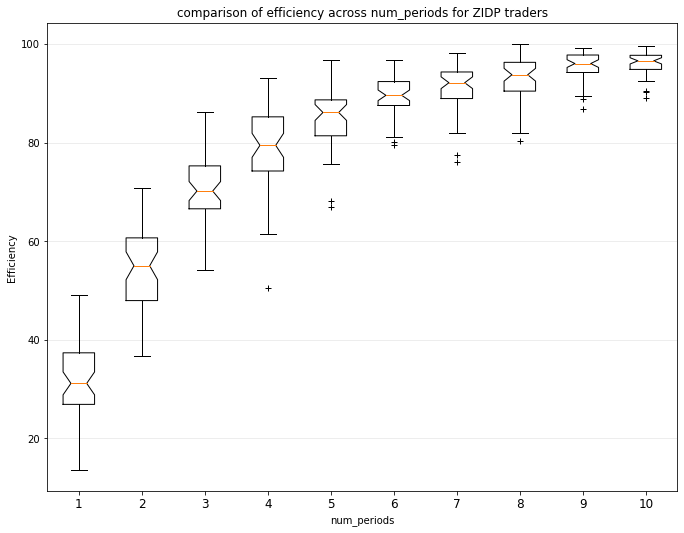

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

In [33]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [ZIDA, ZIDA]     # List of artificial traders, length 2, can be same
sim_name = "dm_zidp_30_20_100"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'num_rounds': 1,
    'grid_size': 5,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 50
}

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table = make_simulation(controls, key)

AttributeError: 'NoneType' object has no attribute 'contracts'

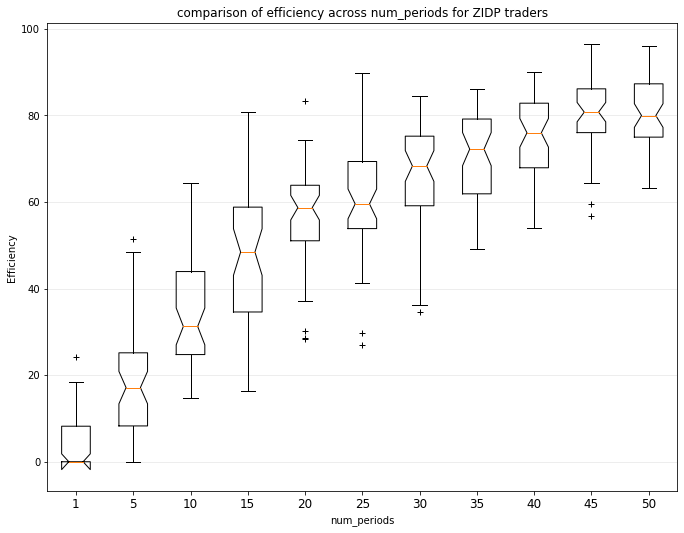

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

### Add num_trials (Number of times each treatment is run

## Run Simulation

In [ ]:
# this works for one treatment key
for key, value in treatments.items():
    treatment_list = value
    for treat in treatment_list:
        # Compile treatment assginment
        assign = f"{key} = {str(treat)}"
        obj = compile(assign, 'assigns', 'exec')
        exec(obj)
        print(f"{key} = {eval(key)}")
        # set up treatment folder
        treat_name = sim_name + '/' + f'_{key}_{treat}'
        clear_make_path(treat_name)
        # run simulation
        sim_mkt = sim.SimulateMarket(treat_name, num_weeks, num_periods, num_rounds,
                             num_traders, trader_objects, grid_size, num_units,
                             debug, plot_on)
        sim_mkt.make_whole_simulation()